In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
''' Keras took all GPU memory so to limit GPU usage, I have add those lines'''

# import tensorflow as tf
# # from keras.backend.tensorflow_backend import set_session
# from tensorflow.python.keras.backend import set_session 
# # tf.compat.v1.keras.backend.set_session()

# config = tf.compat.v1.ConfigProto
# # config.gpu_options.per_process_gpu_memory_fraction = 0.1
# config.gpu_options.allow_growth=True
# set_session(tf.Session(config=config))
''' Keras took all GPU memory so to limit GPU usage, I have add those lines'''

# import tensorflow as tf

conf = tf.compat.v1.ConfigProto()
conf.gpu_options.allow_growth=True
session = tf.compat.v1.Session(config=conf)

# Assume that you have 12GB of GPU memory and want to allocate ~4GB:
# gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)

# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [6]:
img_array = cv2.imread('Training/0/Training_51146675.jpg')

In [7]:
print (img_array)

[[[  2   2   2]
  [  0   0   0]
  [  1   1   1]
  ...
  [ 63  63  63]
  [ 43  43  43]
  [ 28  28  28]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 68  68  68]
  [ 58  58  58]
  [ 43  43  43]]

 [[  0   0   0]
  [  2   2   2]
  [  3   3   3]
  ...
  [ 82  82  82]
  [ 74  74  74]
  [ 50  50  50]]

 ...

 [[116 116 116]
  [114 114 114]
  [115 115 115]
  ...
  [116 116 116]
  [119 119 119]
  [117 117 117]]

 [[113 113 113]
  [115 115 115]
  [115 115 115]
  ...
  [123 123 123]
  [118 118 118]
  [115 115 115]]

 [[112 112 112]
  [116 116 116]
  [114 114 114]
  ...
  [115 115 115]
  [115 115 115]
  [117 117 117]]]


In [8]:
img_array.shape

(48, 48, 3)

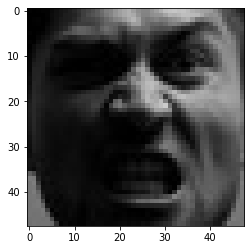

In [9]:
plt.imshow(img_array)

In [10]:
Datadirectory = "Training/"

In [11]:
Classes = ["0","1","2","3","4","5","6"]

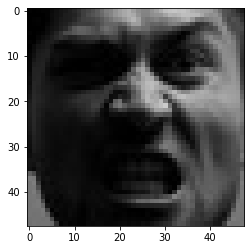

In [12]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
#         backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

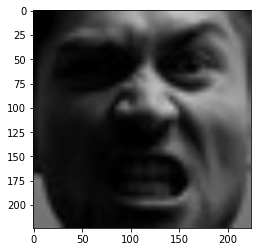

In [13]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
new_array.shape

(224, 224, 3)

#   read all the images and converting them to array

In [15]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

        

In [16]:
create_training_Data()

In [17]:
print(len(training_Data))

11815


In [18]:
temp = np.array(training_Data)

C:\Users\26266\AppData\Local\Temp\ipykernel_11360\2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [19]:
temp.shape

(11815, 2)

In [20]:
import random
random.shuffle(training_Data)

In [21]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [22]:
X.shape

(11815, 224, 224, 3)

In [23]:
# # normalize the data
# X = np.array(X,dtype='uint8').reshape(-1 , img_size , img_size, 3)
 
# X = X/255.0;

for i in range(0,11815):
    X[i]=X[i]/255.0;



In [24]:

# sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)

In [25]:
# from sklearn.datasets import load_boston
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error
# import time


# # some helper functions
# def timer(f):
#     start = time.time()
#     res = f()
#     end = time.time()
#     print("fitting: {}".format(end - start))
#     return res

# def build_model_for_data(data, target):
#     X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2)
#     pipeline = make_pipeline(LinearRegression())
#     model = timer(lambda: pipeline.fit(X_train, y_train))
#     return (X_test, y_test, model)

# # load the dazta
# boston = load_boston()

# # print description
# print(boston['DESCR'])

# # print value distrubutions
# print()
# print()
# print("Example value distribution of features: ")
# for x in boston['data'][0]:
#     print(x)

# min_max = MinMaxScaler()
# boston_min_max = min_max.fit_transform(boston['data'])

# print()
# print("Value distribution after min max: ")
# for x in boston_min_max[0]:
#     print(x)

# std = StandardScaler()
# boston_std = std.fit_transform(boston['data'])

# print()
# print("Value distribution after std: ")
# for x in boston_std[0]:
#     print(x)

# # print model evaluation
# print()
# print("Without:")
# X_test, y_test, model = build_model_for_data(boston['data'], boston['target'])
# prediction = model.predict(X_test)
# print("MSE: {}".format(mean_squared_error(y_test, prediction)))
# print()
# print("MinMax:")
# X_test, y_test, model = build_model_for_data(boston_min_max, boston['target'])
# prediction = model.predict(X_test)
# print("MSE: {}".format(mean_squared_error(y_test, prediction)))
# print()
# print("Std:")
# X_test, y_test, model = build_model_for_data(boston_std, boston['target'])
# prediction = model.predict(X_test)
# print("MSE: {}".format(mean_squared_error(y_test, prediction)))

In [26]:
# import sklearn
# from sklearn.preprocessing import MinMaxScaler
# X = np.array(X,dtype='uint8').reshape(-1, img_size, img_size, 3)
# scaler = MinMaxScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)
# new_array['min max'] = X_scaled.reshape(1,-1)[0]

In [27]:
type(y)

list

In [28]:
Y = np.array(y)

In [29]:
Y.shape

(11815,)

In [30]:
Y[0]

3

In [31]:
y[0]

3

# deep learning model for training - Transfer learning

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
model = tf.keras.applications.MobileNetV2()
    
  

In [34]:
# model = tf.keras.applications.MobileNetV2()

In [35]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [36]:
# new_model.compile(loss='sparse_categorical_crosswntropy',optimizer = 'adam', metrics = ["accuracy"])

In [37]:
base_input = model.layers[0].input

In [38]:
base_output = model.layers[-2].output

In [39]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [40]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output)

In [41]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [42]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [43]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [44]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)
new_model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam', metrics = ["accuracy"])

In [45]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import SGD
# import numpy as np
# import pandas as pd

# class My_Callback(keras.callbacks.Callback):
#     def on_epoch_begin(self, epoch, logs={}):
#       self.epoch = epoch

#     def on_batch_end(self, batch, logs={}):
#         if self.epoch == 2 and batch == 15:
#           print (f"\nStopping at Epoch {self.epoch}, Batch {batch}")
#           self.model.stop_training = True


# X_train = np.random.random((100, 3))
# y_train = pd.get_dummies(np.argmax(X_train[:, :3], axis=1)).values

# clf = Sequential()
# clf.add(Dense(9, activation='relu', input_dim=3))
# clf.add(Dense(3, activation='softmax'))
# clf.compile(loss='categorical_crossentropy', optimizer=SGD())

# clf.fit(X_train, y_train, epochs=15, batch_size=16, callbacks=[My_Callback()])

In [46]:
new_model.fit(X,Y, epochs = 15)

Epoch 1/15


ResourceExhaustedError: Graph execution error:

Detected at node 'model/block_1_expand/Conv2D' defined at (most recent call last):
    File "D:\anaconda\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "D:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "D:\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "D:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "D:\anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "D:\anaconda\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "D:\anaconda\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "D:\anaconda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "D:\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "D:\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "D:\anaconda\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\26266\AppData\Local\Temp\ipykernel_11360\1929409734.py", line 1, in <cell line: 1>
      new_model.fit(X,Y, epochs = 15)
    File "D:\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "D:\anaconda\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "D:\anaconda\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "D:\anaconda\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "D:\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "D:\anaconda\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda\lib\site-packages\keras\layers\convolutional\base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "D:\anaconda\lib\site-packages\keras\layers\convolutional\base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'model/block_1_expand/Conv2D'
OOM when allocating tensor with shape[32,96,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/block_1_expand/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_10985]